In [ ]:
library(pacman)
p_load(lubridate, AUC, tidyverse)

p_load(magrittr) 
p_load(dplyr)
p_load(tidyverse)
p_load(tidyr)
p_load(pacman)
p_load(rlist)
p_load(dummy)
p_load(e1071)
p_load(ROSE)
p_load(rotationForest)
p_load(xgboost)

: 

In [ ]:
p_load(caret)

p_load(FNN)

p_load(randomForest)

options(repr.matrix.max.cols=1000, repr.matrix.max.rows=1000)

: 

In [ ]:
p_load(ranger)

: 

# Building basetable

In [ ]:
table = (read.csv("Data//Mountain_races_final.csv", sep = ";"))
head(table)

Pos,Rider,Team,Time,Rider_ID,Rider_Country,Team_ID,Year,Stage,UCI,ID,Stage.Type,Race,Family.Name,Given.Name,Name,Region,Birthday,Popularity,Size,Weight,FLAT,MOUNTAIN,DOWNHILL,COBBLES,TT,PROLOGUE,SPRINT,ACCELERATION,ENDURANCE,RESISTANCE,RECUP,HILL,ATTACK,gene_sz_firstlastname,gene_f_popularity_max,value_i_rank_voted,value_i_potentiel,fkIDrace,fkIDcyclist_state,fkIDtype_rider,fkIDinjury,fkIDtga_skin,prerace_i_cyclist,race_b_withdrawal,fkIDstaff_physician,fkIDstaff_trainer,limit_i_plain,limit_i_mountain,limit_i_downhilling,limit_i_cobble,limit_i_timetrial,limit_i_prologue,limit_i_sprint,limit_i_acceleration,limit_i_endurance,limit_i_resistance,limit_i_recuperation,limit_i_hill,limit_i_baroudeur,fitness_i_handicap,gene_b_selected_in_roster,gene_b_will_retire,fkIDtraining_camp,gene_i_dossard,gene_i_champion_bit,gene_b_nominated,CONSTANT,gene_sz_soundname,fkIDstate_roster,gene_b_inshortlist,gene_i_date_last_breakaway,gene_i_date_last_punchers,gene_ilist_fkIDfavorite_races,gene_i_year_progression,gene_i_day_progression
1,amador andrey,Movistar Team,05:33:36,745,CRC,5,2012,14,NA,432,Mountain,Giro,Amador Bikkazakova,Andrey,A.Amador Bikkazakova,6101,19860829,21,180,73,65,69,65,53,68,68,60,66,65,65,68,68,63,A.Amador Bikkazakova,0,0,5,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,,0,0
2,barta jan,Team NetApp,+ 00,990,CZE,57,2012,14,NA,2280,Mountain,Giro,Bárta,Jan,J.Bárta,3301,19841207,11,184,73,68,63,67,58,68,67,61,66,64,67,64,66,72,J.Bárta,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,,0,0
3,de marchi alessandro,Androni Giocattoli - Venezuela,+ 02,3103,ITA,23,2012,14,NA,2400,Mountain,Giro,De Marchi,Alessandro,A.De Marchi,201,19860519,7,181,68,65,63,63,53,64,64,61,60,65,64,62,65,64,A.De Marchi,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,,0,0
4,hesjedal ryder,Garmin - Sharp,+ 20,52,CAN,10,2012,14,NA,376,Mountain,Giro,Hesjedal,Ryder,R.Hesjedal,2201,19801209,59,188,72,72,77,76,66,71,72,58,67,75,75,77,78,69,R.Hesjedal,0,0,5,0,3,0,0,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,,,0,0,0,0,,0,0
5,tiralongo paolo,Astana Pro Team,+ 46,359,ITA,25,2012,14,NA,506,Mountain,Giro,Tiralongo,Paolo,P.Tiralongo,219,19770708,36,169,69,66,74,64,52,65,66,61,66,70,72,75,72,72,P.Tiralongo,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,,0,0
6,uran rigoberto,Sky ProCycling,+ 46,117,COL,44,2012,14,NA,566,Mountain,Giro,Urán Urán,Rigoberto,R.Urán Urán,1101,19870126,45,173,62,67,75,66,52,70,70,64,76,71,73,71,76,75,R.Urán Urán,0,0,6,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,,0,0


: 

In [ ]:
table_train = table[table$Year<=2017,]

: 

In [ ]:
table_val = table[(table$Year>2017)&(table$Year<=2019) ,]

: 

In [ ]:
table_test = table[table$Year>2019,]

: 

In [ ]:
basetable_train = table_train %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


: 

In [ ]:
basetable_val = table_val %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


: 

In [ ]:
basetable_test = table_test %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


: 

In [ ]:
basetable_train = (basetable_train)%>% drop_na()
basetable_val = (basetable_val)%>% drop_na()
basetable_test = (basetable_test)%>% drop_na()

: 

In [ ]:
basetable_train$Top10 = as.factor(ifelse(basetable_train$best_position <=10, 1,0))
basetable_train$Top5 = as.factor(ifelse(basetable_train$best_position <=5, 1,0))
basetable_train$Top4 = as.factor(ifelse(basetable_train$best_position <=4, 1,0))
basetable_train$Top3 = as.factor(ifelse(basetable_train$best_position <=3, 1,0))

: 

In [ ]:
table(basetable_train$Top10)


  0   1 
102 203 

: 

In [ ]:
basetable_train$minutes_from_top = NULL
basetable_train$best_position = NULL
basetable_train$Team = NULL
basetable_train$Year = NULL
basetable_train$Stage = NULL
basetable_train$Team_ID = NULL
basetable_train$Race= NULL
table_train <- basetable_train
table_test<- basetable_test
table_val <- basetable_val

: 

In [ ]:
basetable_val$Top10 = as.factor(ifelse(basetable_val$best_position <=10, 1,0))
basetable_val$Top5 = as.factor(ifelse(basetable_val$best_position <=5, 1,0))
basetable_val$Top4 = as.factor(ifelse(basetable_val$best_position <=4, 1,0))
basetable_val$Top3 = as.factor(ifelse(basetable_val$best_position <=3, 1,0))

: 

In [ ]:
table(basetable_val$Top10)


 0  1 
44 90 

: 

In [ ]:
basetable_val$minutes_from_top = NULL
basetable_val$best_position = NULL
basetable_val$Team = NULL
basetable_val$Year = NULL
basetable_val$Stage = NULL
basetable_val$Team_ID = NULL
basetable_val$Race= NULL

: 

# Prediction if finish in the top 10

## Random Forest

## Tuning

-0.03191489 1e-09 
0.0106383 1e-09 
0 1e-09 


,mtry,OOBError
1.OOB,1,0.3049180
2.OOB,2,0.3049180
3.OOB,3,0.3081967
4.OOB,4,0.3180328


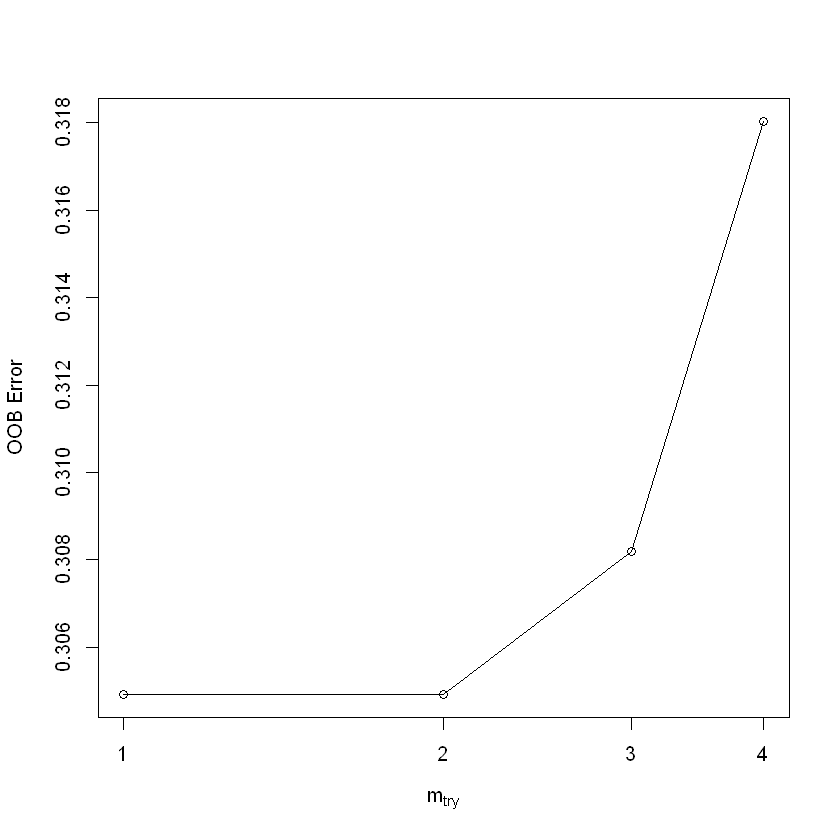

: 

In [ ]:
set.seed(123)
m2 = tuneRF(basetable_train[,-(40:43)], basetable_train$Top10,mtryStart=3,step=0.9,ntreeTry = 1000,trace = FALSE,improve=0.000000001)
m2

In [ ]:
# hyperparameter grid search
hyper_grid <- expand.grid(
   num_trees = c(1000),
  mtry       = seq(1, 13, by = 1),
  node_size  = seq(1, 13, by = 2),
  sampe_size = c(.55, .632, .70,0.75,.80),
  OOB_RMSE   = 0
 
)
nrow(hyper_grid)

[1] 455

: 

In [ ]:
for(i in 1:nrow(hyper_grid)) {
  
  # train model
  model <- ranger(
    x               = basetable_train[,-(40:43)], 
    y               = basetable_train$Top10, 
    num.trees       = hyper_grid$mtry[i],
    mtry            = hyper_grid$mtry[i],
    min.node.size   = hyper_grid$node_size[i],
    sample.fraction = hyper_grid$sampe_size[i],
    probability     = TRUE,
    seed            = 123
  )
  
  # add OOB error to grid
  hyper_grid$OOB_RMSE[i] <- sqrt(model$prediction.error)
}

: 

In [ ]:
hyper_grid %>% 
  dplyr::arrange(OOB_RMSE) %>%
  head(10)


num_trees,mtry,node_size,sampe_size,OOB_RMSE
1000,8,13,0.750,0.4649227
1000,12,13,0.750,0.4663225
1000,11,13,0.632,0.4679434
1000,8,11,0.750,0.4679802
1000,13,5,0.800,0.4688233
1000,12,7,0.550,0.4694210
1000,13,1,0.800,0.4715967
1000,11,11,0.632,0.4717581
1000,10,13,0.750,0.4721002
1000,8,7,0.750,0.4728764


: 

### 5x2cv

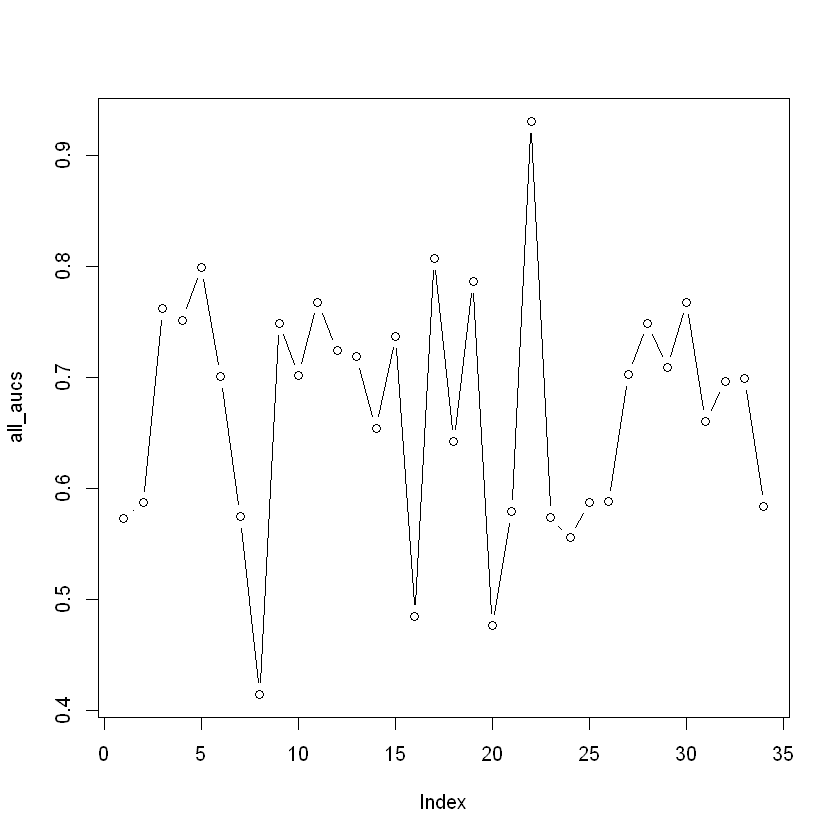

: 

In [ ]:
# By setting a new unique seed, you ensure a different
# 'random' split
seeds <- c(123, 246, 91, 949, 9000, 1860, 1853, 1416, 515, 369,145,36920,877,124,617,1743,4852,9001,9005,9004,14,15,19,18,246,47,1,2,3,4,5,6,7,20)  #give 10 random values
all_aucs <- vector(length = length(seeds))

for (i in 1:length(seeds)) {
    set.seed(seeds[i])
    allind <- sample(x = 1:nrow(basetable_train), size = nrow(basetable_train),
        replace = TRUE)  # WITH replacement
    

    # block to get indices
    trainind <- allind[1:round(length(allind) * 0.70)]
    testind <- allind[!allind %in% trainind]  #get all indices which are not in training

    #actual subsetting
    train <- basetable_train[trainind, ]
    yTRAIN <- train$Top10
    train$Top10 = NULL
    train$Top5 = NULL
    train$Top4 = NULL
    train$Top3 = NULL
    
    test <- basetable_train[testind, ]
    yTEST <- test$Top10
    test$Top10 <- NULL
    test$Top5 = NULL
    test$Top4 = NULL
    test$Top3 = NULL
    
    #fit
    model <- ranger(x=train, y = yTRAIN, num.trees = 500, mtry = 8,min.node.size = 13, sample.fraction = 0.75, probability = TRUE)
    # predict on second set (test)0
    predictions =  predict(model,test)$predictions[,2]   
    
    # evaluate and store
    all_aucs[i] <- AUC::auc(roc(predictions, yTEST))
}

# Plot
plot(all_aucs, type = "b")

In [ ]:
mean(all_aucs)

[1] 0.6705663

: 

## Validation

In [ ]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top10
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL

test <- basetable_val
yTEST <- test$Top10
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL

#fit
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=3)
# predict on second set (test)
predictions <- predict(rFmodel, test, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.714899

: 

In [ ]:
auc = AUC::auc(roc(predictions,factor(yTEST)))

: 

In [ ]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

: 

In [ ]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0  8  4
         1 36 86

[1] "AUC:  0.71489898989899"

[1] "Accuracy:  0.701492537313433"

[1] "Recall:  0.955555555555556"

[1] "Precision:  0.704918032786885"

: 

In [ ]:
#fit
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 8,min.node.size = 13, sample.fraction = 0.75, probability = TRUE, seed = 123)
# predict on second set (test)
predictions =  predict(model,test)$predictions[,2]

AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.6830808

: 

In [ ]:
auc = AUC::auc(roc(predictions,factor(yTEST)))

: 

In [ ]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

: 

In [ ]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 13  5
         1 31 85

[1] "AUC:  0.683080808080808"

[1] "Accuracy:  0.73134328358209"

[1] "Recall:  0.944444444444444"

[1] "Precision:  0.732758620689655"

: 

## XGBoost

### Boruta & VarSelRF

In [ ]:
#feature selection on basetable_train
#boruta
table_train10 <- table_train
table_val10 <- table_val
table_train10$Top5 <- NULL
table_train10$Top4 <- NULL
table_train10$Top3 <- NULL
table_val10$Top5 <- NULL
table_val10$Top4 <- NULL
table_val10$Top3 <- NULL


rf_boruta <- Boruta(table_train10[, !names(table_train10) %in% c("Top10"
)], table_train10$Top10, doTrace = 0)

varsel_boruta <- names(rf_boruta$finalDecision[rf_boruta$finalDecision ==
                                                 "Confirmed"])


#Here less features are included in the model so we choose varsel_boruta as a feature selection method
##varSelRF
rf_vsrf <- varSelRF(table_train10[, !names(table_train10) %in% c("Top10")], table_train10$Top10, vars.drop.frac = 0.1,
                    ntree = 500, ntreeIterat = 100)
varsel_vsrf <- rf_vsrf$selected.vars

#new train en val set
y_train <- table_train10$Top10
train <- table_train10
train$Top10<- NULL

y_val <- table_val10$Top10
val <- table_val10
val$Top10 <-NULL

test <- table_test

train_fs <- train[varsel_boruta]
val_fs <- val[varsel_boruta]
test_fs <- test[varsel_boruta]

### Train

In [ ]:
#preparing matrices
#convert all data to numeric format
trainxgb <- train_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
testxgb <- test_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
valxgb <- val_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)

dtrain <- xgb.DMatrix(data = as.matrix(trainxgb),
                      label = as.numeric(as.character(y_train))) 
dval <- xgb.DMatrix(data = as.matrix(valxgb), 
                    label = as.numeric(as.character(y_val))) 
dtest <- xgb.DMatrix(data = as.matrix(testxgb))


#plotting learning curve of the number of iterations
#Need to have watchlist and verbose turned on
watchlist <- list(train=dtrain, test=dval)
xgbModel_opt <- xgb.train(data = dtrain, 
                          nrounds = 150, 
                          objective = "binary:logistic", 
                          verbose = 2, 
                          watchlist = watchlist,
                          eval_metric = 'auc')

history <- xgbModel_opt$evaluation_log

history %>% pivot_longer(2:3, names_to = "set", values_to = "performance") %>% 
  ggplot(., aes(iter, performance, col = set))+
  geom_point()+ geom_line()+
  facet_wrap(~set)

### Validation

In [ ]:
##Optimize nrounds BEST
opt_iter <- history$iter[which.max(history$test_auc)]

xgbModel_opt <- xgb.train(data = dtrain, 
                          nrounds = 5, 
                          objective = "binary:logistic",
                          eta = 0.52,
                          verbose = 0, 
                          eval_metric = 'auc')

predxgb <- predict(xgbModel_opt,dval)
AUC::auc(roc(predxgb,y_val))

### Test

In [ ]:
predxgb <- predict(xgbModel_opt,dtest)
predxgb <-ifelse(predxgb>=0.5,1,0)

# Prediction if finish in the top 5

## Random Forest

## Tuning

In [ ]:
# hyperparameter grid search
hyper_grid <- expand.grid(
   num_trees = c(1000),
  mtry       = seq(1, 13, by = 1),
  node_size  = seq(1, 13, by = 2),
  sampe_size = c(.55, .632, .70,0.75,.80),
  OOB_RMSE   = 0
 
)
nrow(hyper_grid)

[1] 455

: 

In [ ]:
for(i in 1:nrow(hyper_grid)) {
  
  # train model
  model <- ranger(
    x               = basetable_train[,-(40:43)], 
    y               = basetable_train$Top5, 
    num.trees       = hyper_grid$mtry[i],
    mtry            = hyper_grid$mtry[i],
    min.node.size   = hyper_grid$node_size[i],
    sample.fraction = hyper_grid$sampe_size[i],
    probability     = TRUE,
    seed            = 123
  )
  
  # add OOB error to grid
  hyper_grid$OOB_RMSE[i] <- sqrt(model$prediction.error)
}

: 

In [ ]:
hyper_grid %>% 
  dplyr::arrange(OOB_RMSE) %>%
  head(10)


num_trees,mtry,node_size,sampe_size,OOB_RMSE
1000,12,13,0.550,0.4825089
1000,12,11,0.550,0.4867816
1000,11,13,0.550,0.4885454
1000,13,11,0.700,0.4892480
1000,12,13,0.632,0.4904381
1000,11,11,0.550,0.4912506
1000,12,11,0.632,0.4921804
1000,13,13,0.700,0.4931203
1000,8,5,0.550,0.4949395
1000,12,5,0.550,0.4954629


: 

### 5x2cv

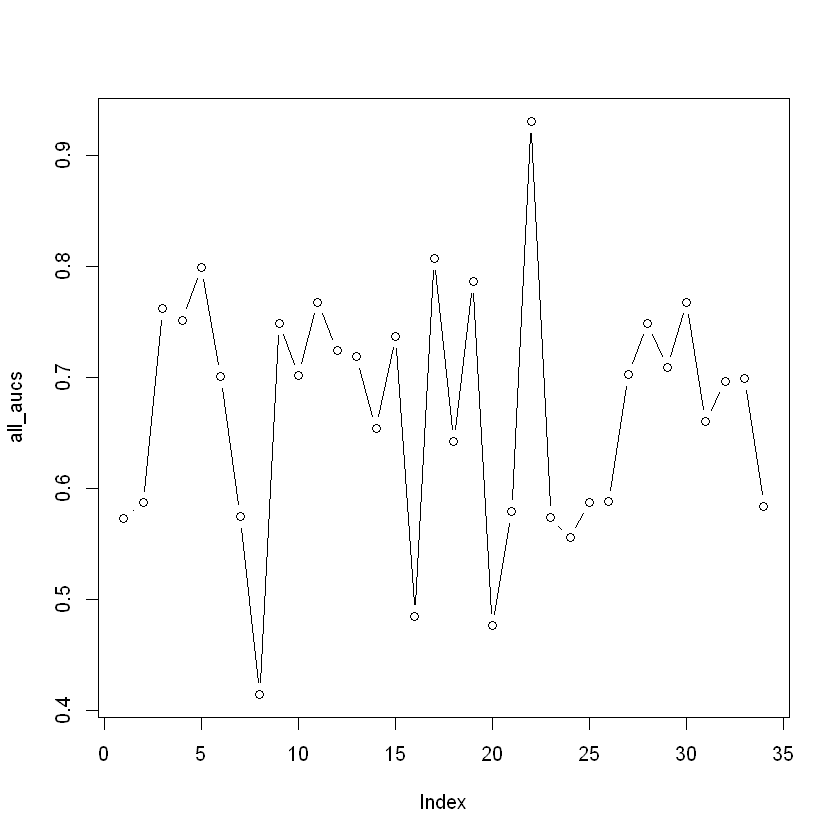

: 

In [ ]:
# By setting a new unique seed, you ensure a different
# 'random' split
seeds <- c(123, 246, 91, 949, 9000, 1860, 1853, 1416, 515, 369,145,36920,877,124,617,1743,4852,9001,9005,9004,14,15,19,18,246,47,1,2,3,4,5,6,7,20)  #give 10 random values
all_aucs <- vector(length = length(seeds))

for (i in 1:length(seeds)) {
    set.seed(seeds[i])
    allind <- sample(x = 1:nrow(basetable_train), size = nrow(basetable_train),
        replace = TRUE)  # WITH replacement
    

    # block to get indices
    trainind <- allind[1:round(length(allind) * 0.70)]
    testind <- allind[!allind %in% trainind]  #get all indices which are not in training

    #actual subsetting
    train <- basetable_train[trainind, ]
    yTRAIN <- train$Top10
    train$Top10 = NULL
    train$Top5 = NULL
    train$Top4 = NULL
    train$Top3 = NULL
    
    test <- basetable_train[testind, ]
    yTEST <- test$Top10
    test$Top10 <- NULL
    test$Top5 = NULL
    test$Top4 = NULL
    test$Top3 = NULL
    
    #fit
    model <- ranger(x=train, y = yTRAIN, num.trees = 500, mtry = 8,min.node.size = 13, sample.fraction = 0.75, probability = TRUE)
    # predict on second set (test)0
    predictions =  predict(model,test)$predictions[,2]   
    
    # evaluate and store
    all_aucs[i] <- AUC::auc(roc(predictions, yTEST))
}

# Plot
plot(all_aucs, type = "b")

In [ ]:
mean(all_aucs)

[1] 0.6705663

: 

## Validation

In [ ]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL

test <- basetable_val
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL

#fit
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=8)
# predict on second set (test)
predictions <- predict(rFmodel, test, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.6551916

: 

In [ ]:
auc = AUC::auc(roc(predictions,factor(yTEST)))

: 

In [ ]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

: 

In [ ]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 27 18
         1 39 50

[1] "AUC:  0.655191622103387"

[1] "Accuracy:  0.574626865671642"

[1] "Recall:  0.735294117647059"

[1] "Precision:  0.561797752808989"

: 

In [ ]:
#fit
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 8,min.node.size = 13, sample.fraction = 0.75, probability = TRUE, seed = 123)
# predict on second set (test)
predictions =  predict(model,test)$predictions[,2]

AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.6830808

: 

In [ ]:
auc = AUC::auc(roc(predictions,factor(yTEST)))

: 

In [ ]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

: 

In [ ]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 13  5
         1 31 85

[1] "AUC:  0.683080808080808"

[1] "Accuracy:  0.73134328358209"

[1] "Recall:  0.944444444444444"

[1] "Precision:  0.732758620689655"

: 